<a href="https://colab.research.google.com/github/ssobranding/mypage/blob/main/WEEK_4_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK THREE: Modeling (part one)

## EXERCISE #1 - Linear Regression

### FIRST TASK - Fit the other models

In [ ]:
import pandas as pd
import numpy as np

# read in the data
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv", header=None)

x_values = df.drop([13], axis = 1)

y_value = df[13]

from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=1234)

from sklearn.linear_model import LinearRegression as LR

# create the LR model
lr_algo = LR()
lr_model = lr_algo.fit(X_train, Y_train)

from sklearn.linear_model import Lasso, Ridge, ElasticNet

# LASSO
l1_algo = Lasso(alpha=.5)
l1_model = l1_algo.fit(X_train, Y_train)

# Ridge
l2_algo = Ridge(alpha=.5)
l2_model = l2_algo.fit(X_train, Y_train)

# ElasticNet
elastic_algo = ElasticNet(alpha=.5, l1_ratio=.5)
elastic_model = elastic_algo.fit(X_train, Y_train)

### SECOND TASK - Print and check the parameters

In [ ]:
# doing this as a for loop because I'm lazy

models = [lr_model, l1_model, l2_model, elastic_model]
model_names = ['LR', 'LASSO', 'Ridge', 'ElasticNet']

for i in range(4):
  # Set model and print name
  model = models[i]
  print(f'Model: {model_names[i]}')

  # get and print the alpha value
  alpha = model.intercept_
  print(f'Alpha: {alpha}')

  # we'll run a count variable we can update in our for loop
  # this will allow us to print the beta value name each time
  count = 1

  # we expect 13x beta values so we'll loop through and print
  betas = model.coef_
  for beta in betas:
    # use the round function to round the coefficient to 2 decimal places
    print(f'Beta #{count}: {round(beta, 2)}')
    # increase the count value by one for the next beta name
    count += 1

  print('\n')

Model: LR
Alpha: 45.73718122895507
Beta #1: -0.1
Beta #2: 0.06
Beta #3: 0.03
Beta #4: 3.0
Beta #5: -20.41
Beta #6: 2.89
Beta #7: -0.01
Beta #8: -1.76
Beta #9: 0.34
Beta #10: -0.01
Beta #11: -1.02
Beta #12: 0.01
Beta #13: -0.53


Model: LASSO
Alpha: 38.63363289724569
Beta #1: -0.07
Beta #2: 0.07
Beta #3: -0.0
Beta #4: 0.0
Beta #5: -0.0
Beta #6: 1.63
Beta #7: 0.0
Beta #8: -1.08
Beta #9: 0.3
Beta #10: -0.02
Beta #11: -0.78
Beta #12: 0.01
Beta #13: -0.65


Model: Ridge
Alpha: 41.48369969555033
Beta #1: -0.1
Beta #2: 0.06
Beta #3: 0.01
Beta #4: 2.91
Beta #5: -14.52
Beta #6: 2.93
Beta #7: -0.01
Beta #8: -1.66
Beta #9: 0.32
Beta #10: -0.01
Beta #11: -0.95
Beta #12: 0.01
Beta #13: -0.53


Model: ElasticNet
Alpha: 41.80264754630359
Beta #1: -0.08
Beta #2: 0.07
Beta #3: -0.02
Beta #4: 0.0
Beta #5: -0.0
Beta #6: 1.29
Beta #7: 0.0
Beta #8: -1.11
Beta #9: 0.33
Beta #10: -0.02
Beta #11: -0.81
Beta #12: 0.01
Beta #13: -0.67




As we can see, all three regularisation methods reduce the size of the betas (which we should expect - that's what they do).

We may notice that $L1$ reduces some of the beta weights to $0$, while $L2$ does not. While $L2$ theoretically can reduce to $0$ with a big enough $\alpha$, this will not likely happen in practice.

Why is this? Well the loss function says we take the square of the $\beta$'s. When the $\beta$'s get small - below 1 - then reducing them further becomes less important to the algorithm's minimisation objective. For instance, $0.1^2$ = $0.01$ ... a smaller number. As the algorithm is minimising these __AND__ the OLS objective then when the $\beta$ is small it becomes less important in the optimisation. I.e. there will be more value in changing the OLS than there would be moving a $\beta$ from $0.1$ to $0.01$. Because $L1$ treats $\beta$'s as absolute values, there continues to be value in reducing them - often down to $0$.

ElasticNet combines $L1$ and $L2$ and we can see that in the results. Some are $0$ but fewer than $L1$ overall.

### THIRD TASK - Comparing the scores

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

# the same for loop again
for i in range(4):
  # Set model and print name
  model = models[i]
  print(f'Model: {model_names[i]}')

  # predict the test data
  predict = model.predict(X_test)

  # calculate each metric by comparing the prediction with the real value in Y_test
  print(f'MSE: {round(MSE(Y_test, predict),2)}')
  print(f'RMSE: {round(RMSE(Y_test, predict),2)}')
  print(f'MAE: {round(MAE(Y_test, predict),2)}')
  print(f'R2: {round(R2(Y_test, predict),2)}')
  print('\n')

Model: LR
MSE: 23.96
RMSE: 4.9
MAE: 3.58
R2: 0.77


Model: LASSO
MSE: 27.36
RMSE: 5.23
MAE: 3.6
R2: 0.73


Model: Ridge
MSE: 23.57
RMSE: 4.86
MAE: 3.5
R2: 0.77


Model: ElasticNet
MSE: 28.3
RMSE: 5.32
MAE: 3.67
R2: 0.72




By nearly all of the metrics Ridge performs best. We also prefer this to normal Linear Regression, even if that was slightly better, because there is regularisation. Overall $L2$ wins this time.

## EXERCISE #2 - Logistic Regression

### FIRST TASK - Calculate the metrics

In [ ]:
from sklearn.datasets import load_breast_cancer

# import the data
data = load_breast_cancer()

# create a DataFrame of features
x_values = pd.DataFrame(data.data, columns=data.feature_names)

from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data
normal_data = scaler.fit_transform(x_values)

# recreate x_values using the scaled data and original feature names
x_values = pd.DataFrame(normal_data, columns=data.feature_names)

y_value = pd.DataFrame(data.target, columns=['class'])
y_value = np.ravel(y_value)

# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=4567, stratify=y_value)

from sklearn.linear_model import LogisticRegression as LogR

# create the model
logR_algo = LogR(penalty=None)
logR_model = logR_algo.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

# predict the test data
predict = logR_model.predict(X_test)

print(f'Accuracy: {round(accuracy_score(Y_test, predict),2)}')

Accuracy: 0.96


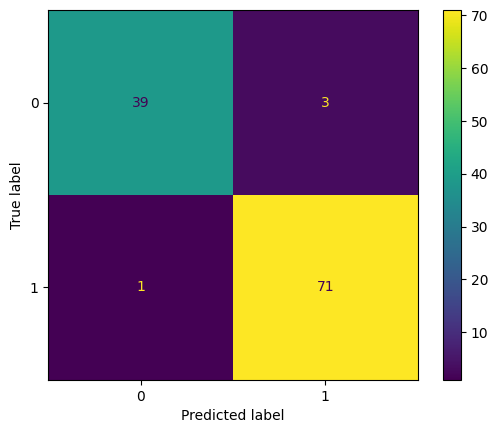

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as CM

# create a confusion matrix
CM.from_predictions(Y_test, predict)

__MICRO SCORES__:

*   Precision = $\frac{TN + TP} {TN + TP + FP + FN}$

*   Precision = $\frac{39 + 71} {39 + 71 + 3 + 1}$ = $\frac{110} {114}$

*   Precision = 0.96

*   Recall = $\frac{TN + TP} {TN + TP + FP + FN}$

*   Recall = $\frac{39 + 71} {39 + 71 + 3 + 1}$ = $\frac{110} {114}$

*   Recall = 0.96

Note that these are the same (and in fact the same as the accuracy score). This will always be true of micro scores so we won't bother with F1.

__MACRO SCORES__:
*   $Precision{0}$ = $\frac{TP{0}} {TP{0} + FP{0}}$

*   $Precision{0}$ = $\frac{TN} {TN + FN}$

*   $Precision{0}$ = $\frac{39} {39 + 1}$ = $\frac{39} {40}$

*   $Precision{0}$ = 0.975
<br>

*   $Precision{1}$ = $\frac{TP{1}} {TP{1} + FP{1}}$

*   $Precision{1}$ = $\frac{TP} {TP + FP}$

*   $Precision{1}$ = $\frac{71} {71 + 3}$ = $\frac{71} {74}$

*   $Precision{1}$ = 0.960
<br>

*   $Precision$ = $\frac{Precision{0} + Precision{1}} {2}$ = $\frac{0.975 + 0.960} {2} = \frac{1.935} {2}$

*   $Precision$ = $0.967$

<br>
<br>

*   $Recall{0}$ = $\frac{TP{0}} {TP{0} + FN{0}}$

*   $Recall{0}$ = $\frac{TN} {TN + FP}$

*   $Recall{0}$ = $\frac{39} {39 + 3}$ = $\frac{39} {42}$

*   $Recall{0}$ = 0.923

<br>

*   $Recall{1}$ = $\frac{TP{1}} {TP{1} + FN{1}}$

*   $Recall{1}$ = $\frac{TP} {TP + FN}$

*   $Recall{1}$ = $\frac{71} {71 + 1}$ = $\frac{71} {72}$

*   $Recall{1}$ = 0.986

<br>

*   $Recall$ = $\frac{Recall{0} + Recall{1}} {2}$ = $\frac{0.923 + 0.986} {2} = \frac{1.909} {2}$

*   $Recall$ = $0.955$

<br>
<br>



*   $F1$ = $ 2 \cdotp \frac{Precision \cdotp Recall} {Precision + Recall} = 2 \cdotp \frac{0.967 \cdotp 0.955} {0.967 + 0.955} = 0.976$



### SECOND TASK: Change Regularisation

In [ ]:
# create the model
logR_l1_algo = LogR(penalty='l1')
logR_l1_model = logR_algo.fit(X_train, Y_train)

ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

OK error. Logistic regression's default solver only supports $L2$ not $L1$. We can check the documentation and changes as follows:

In [ ]:
# create the model
logR_l1_algo = LogR(penalty='l1', solver='liblinear')
logR_l1_model = logR_l1_algo.fit(X_train, Y_train)

So now we can create them all:

In [ ]:
# create the model
logR_l2_algo = LogR(penalty='l2')
logR_l2_model = logR_l2_algo.fit(X_train, Y_train)

logR_en_algo = LogR(penalty='l1', solver='liblinear')
logR_en_model = logR_en_algo.fit(X_train, Y_train)

And let's check accuracy:

In [ ]:
models = [logR_model, logR_l1_model, logR_l2_model, logR_en_model]
model_names = ['LR', 'L1', 'L2', 'ElasticNet']

for i in range(4):
  # Set model and print name
  model = models[i]
  print(f'Model: {model_names[i]}')

  # predict the test data
  predict = model.predict(X_test)

  print(f'Accuracy: {round(accuracy_score(Y_test, predict),2)}')
  print("\n")

Model: LR
Accuracy: 0.96


Model: L1
Accuracy: 0.97


Model: L2
Accuracy: 0.96


Model: ElasticNet
Accuracy: 0.97




Not much difference but we may pick $L1$ or ElasticNet.